# Exploratory Data Analysis for ATM Cash Flow Prediction

Table of Contents:
    1. Importing Libraries
    2. Importing Data
        - Fixing data
    3. Plots
        - Data co-relation
    4. Parameter studies

# Importing necessary libraries


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime 
%matplotlib inline

# Importing the data set 

In [2]:
data = pd.read_csv("../data/aggregated_atm_data.csv")
data

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
11584,Big Street ATM,29-09-2017,137,34,103,468800,146200,322600,FRIDAY,H,H,WHH
11585,Mount Road ATM,29-09-2017,79,27,52,305100,172500,132600,FRIDAY,H,H,WHH
11586,Airport ATM,29-09-2017,117,77,40,709900,576800,133100,FRIDAY,H,H,WHH
11587,KK Nagar ATM,29-09-2017,76,48,28,408700,279900,128800,FRIDAY,H,H,WHH


**Checking for null values in the dataset**

In [55]:
data.isnull().sum()

ATM Name                        0
Transaction Date                0
No Of Withdrawals               0
No Of XYZ Card Withdrawals      0
No Of Other Card Withdrawals    0
Total amount Withdrawn          0
Amount withdrawn XYZ Card       0
Amount withdrawn Other Card     0
Weekday                         0
Festival Religion               0
Working Day                     0
Holiday Sequence                0
dtype: int64


### Variable Datatype
Here we see that date is an object instead of datetime object

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 12 columns):
ATM Name                        11589 non-null object
Transaction Date                11589 non-null object
No Of Withdrawals               11589 non-null int64
No Of XYZ Card Withdrawals      11589 non-null int64
No Of Other Card Withdrawals    11589 non-null int64
Total amount Withdrawn          11589 non-null int64
Amount withdrawn XYZ Card       11589 non-null int64
Amount withdrawn Other Card     11589 non-null int64
Weekday                         11589 non-null object
Festival Religion               11589 non-null object
Working Day                     11589 non-null object
Holiday Sequence                11589 non-null object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


In [13]:
data.describe()

,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card
count,11589.000000,11589.000000,11589.000000,1.158900e+04,1.158900e+04,1.158900e+04
mean,123.341099,67.567694,55.773406,5.223059e+05,3.345604e+05,1.877455e+05
std,67.315288,47.849517,38.506475,3.248167e+05,2.470771e+05,1.502351e+05
min,1.000000,0.000000,0.000000,1.000000e+02,0.000000e+00,0.000000e+00
25%,79.000000,34.000000,25.000000,3.057000e+05,1.560000e+05,7.910000e+04
50%,115.000000,57.000000,50.000000,4.700000e+05,2.816000e+05,1.586000e+05
75%,158.000000,87.000000,78.000000,6.716000e+05,4.485000e+05,2.560000e+05
max,491.000000,345.000000,310.000000,2.549800e+06,1.907800e+06,1.472600e+06


## Fixing anomalies
The weekday column had an anomaly and hence every entry has been converted to uppercase

In [14]:
data['Weekday'] = data['Weekday'].str.upper()
data
#Converted all entries of Weekday column to uppercase since there was an anomaly in format

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,SATURDAY,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,SATURDAY,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,SATURDAY,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,SATURDAY,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,SATURDAY,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
11584,Big Street ATM,29-09-2017,137,34,103,468800,146200,322600,FRIDAY,H,H,WHH
11585,Mount Road ATM,29-09-2017,79,27,52,305100,172500,132600,FRIDAY,H,H,WHH
11586,Airport ATM,29-09-2017,117,77,40,709900,576800,133100,FRIDAY,H,H,WHH
11587,KK Nagar ATM,29-09-2017,76,48,28,408700,279900,128800,FRIDAY,H,H,WHH


The date column type has been changed to datetime object to access month and year and date specifically for future plots or row access

In [15]:
data['Transaction Date'] = pd.to_datetime(data['Transaction Date']) 
data


,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,H,WHH
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,SATURDAY,C,H,WHH
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,SATURDAY,C,H,WHH
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,SATURDAY,C,H,WHH
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,SATURDAY,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
11584,Big Street ATM,2017-09-29,137,34,103,468800,146200,322600,FRIDAY,H,H,WHH
11585,Mount Road ATM,2017-09-29,79,27,52,305100,172500,132600,FRIDAY,H,H,WHH
11586,Airport ATM,2017-09-29,117,77,40,709900,576800,133100,FRIDAY,H,H,WHH
11587,KK Nagar ATM,2017-09-29,76,48,28,408700,279900,128800,FRIDAY,H,H,WHH


 Number of entries as per each column name is defined by the following cells which gives us an approximate headstart on what trends to observe and frequency of entries for particular variables

In [16]:
data['ATM Name'].value_counts()

KK Nagar ATM          2371
Christ College ATM    2355
Big Street ATM        2354
Mount Road ATM        2256
Airport ATM           2253
Name: ATM Name, dtype: int64

In [17]:
data['Working Day'].value_counts()

W    6621
H    4968
Name: Working Day, dtype: int64

In [18]:
data['Festival Religion'].value_counts()
#The definition of these symbols is unclear
# The various religions are NH, H, N, M, C
# I'm assuming NH = Not holy, H = Holy, could be anything

NH    10727
H       367
N       198
M       178
C       119
Name: Festival Religion, dtype: int64

In [19]:
data['Weekday'].value_counts()
#tells us which days are busiest

SUNDAY       2686
SATURDAY     1649
TUESDAY      1502
WEDNESDAY    1462
MONDAY       1458
THURSDAY     1420
FRIDAY       1412
Name: Weekday, dtype: int64

# Plots

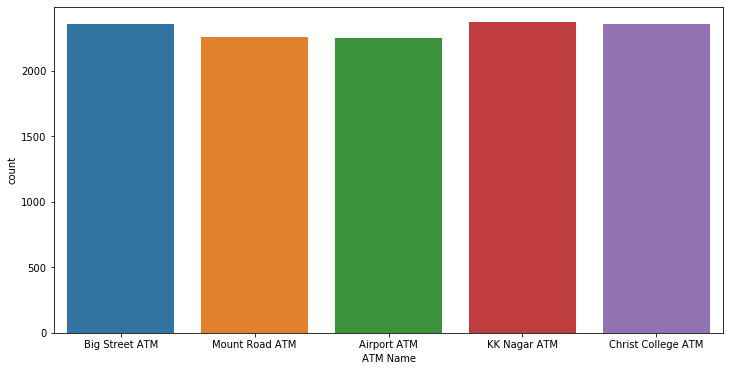

In [20]:
plt.figure(figsize=(12,6))
sns.countplot(x='ATM Name', data = data)

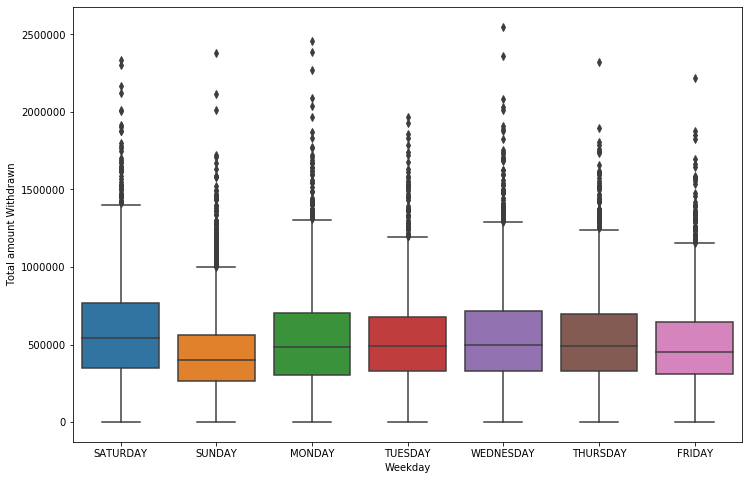

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Weekday', y='Total amount Withdrawn', data=data)

 The spikes in the plot shows that they are outliers to the data set at several instances

c:\users\vismit\appdata\local\programs\python\python38\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


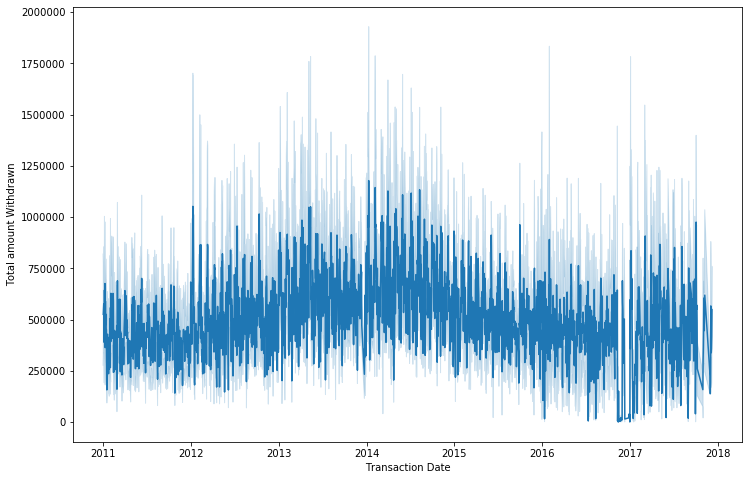

In [27]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Transaction Date', y='Total amount Withdrawn', data = data)

**In the following plot we can see a dip in the Amount withdrawn and this dip needs to be studied and adjusted for**


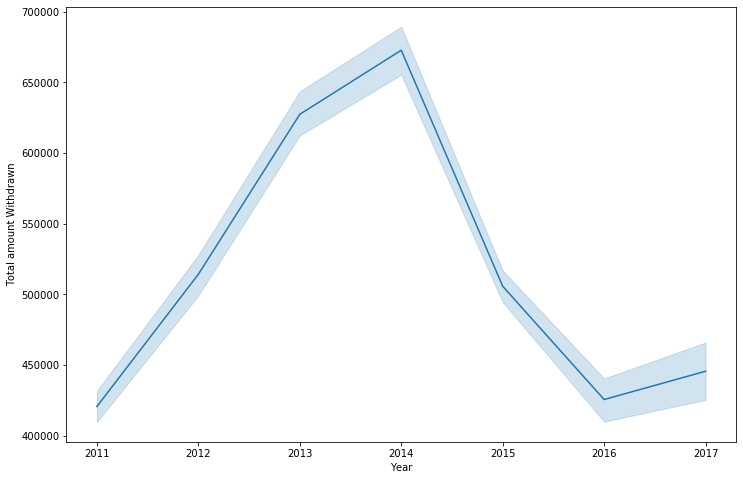

In [28]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='Total amount Withdrawn', data = data)

 A number of other features affects the following plot such as the festival and religion feature as a number offestivals in a particular month will yield more withdrawals compared to a month with lesser festivals

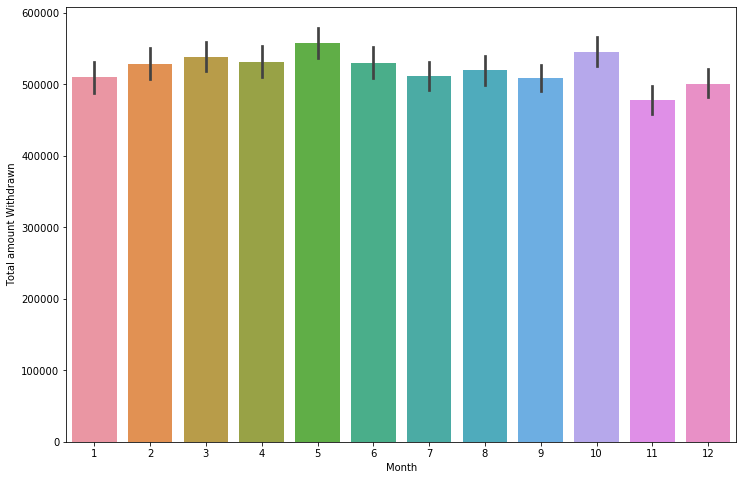

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x='Month', y='Total amount Withdrawn', data=data)

In [45]:
data['Holiday Sequence'].value_counts()
#It's important to keep the count of sequence equal while comparing data for the different sequences and we cannot say one sequence has more preference because more money was taken out in that pattern as it could also be because of more number of appearances of that sequence.

WWW    3621
HHW    2763
WHH    1678
HWW    1447
WWH    1408
WHW     284
HHH     253
HWH     135
Name: Holiday Sequence, dtype: int64

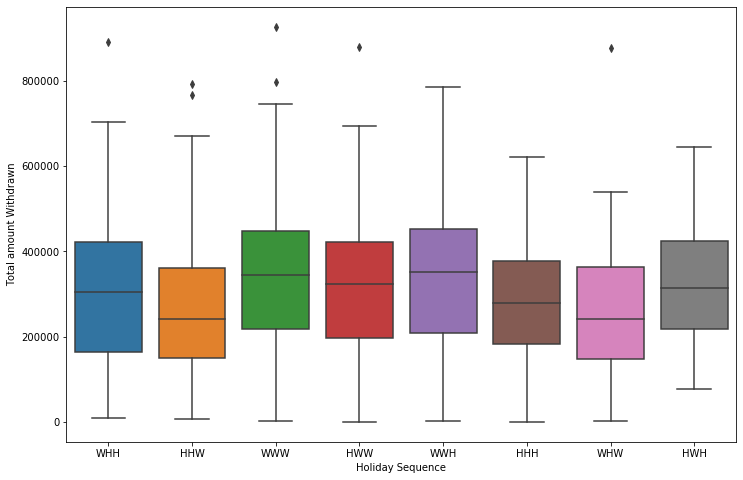

In [30]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Holiday Sequence', y='Total amount Withdrawn', data=Bigstreet)

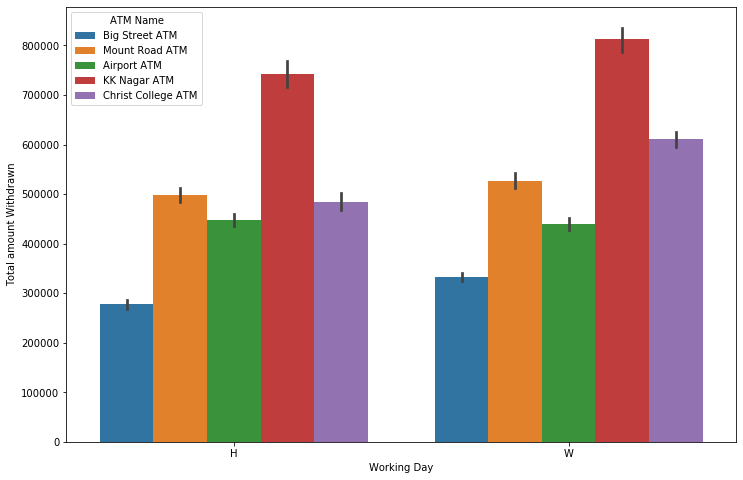

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x='Working Day', y='Total amount Withdrawn', hue = "ATM Name",data=data)
#we can see all atms perform marginally better on working days compared to holidays except airport atm as holidays means more people flying across states and countries

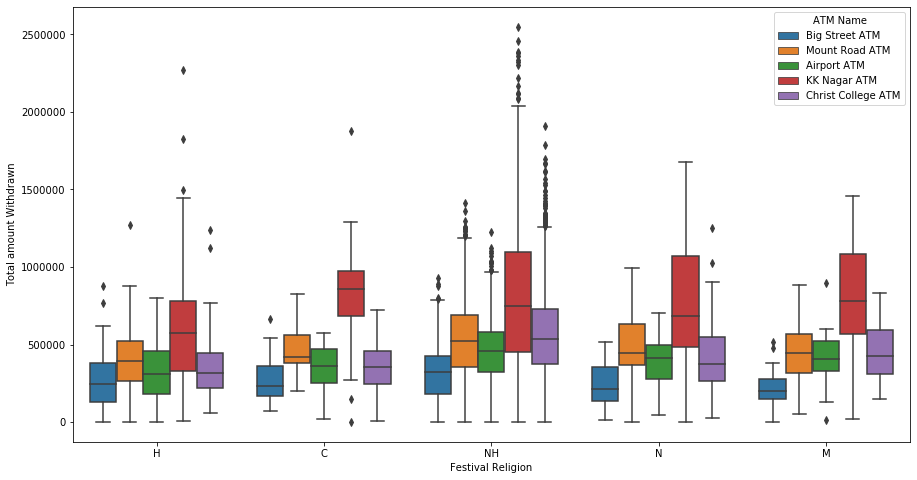

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Festival Religion', y='Total amount Withdrawn',hue = "ATM Name", data=data)

### Linearity between different features of the data set is represented by the pairplot
Doesn't really help much other than pointing out anomalies if there are any, but as of now the plots show a balanced relation between features, but most of the features aren't going to be used either.

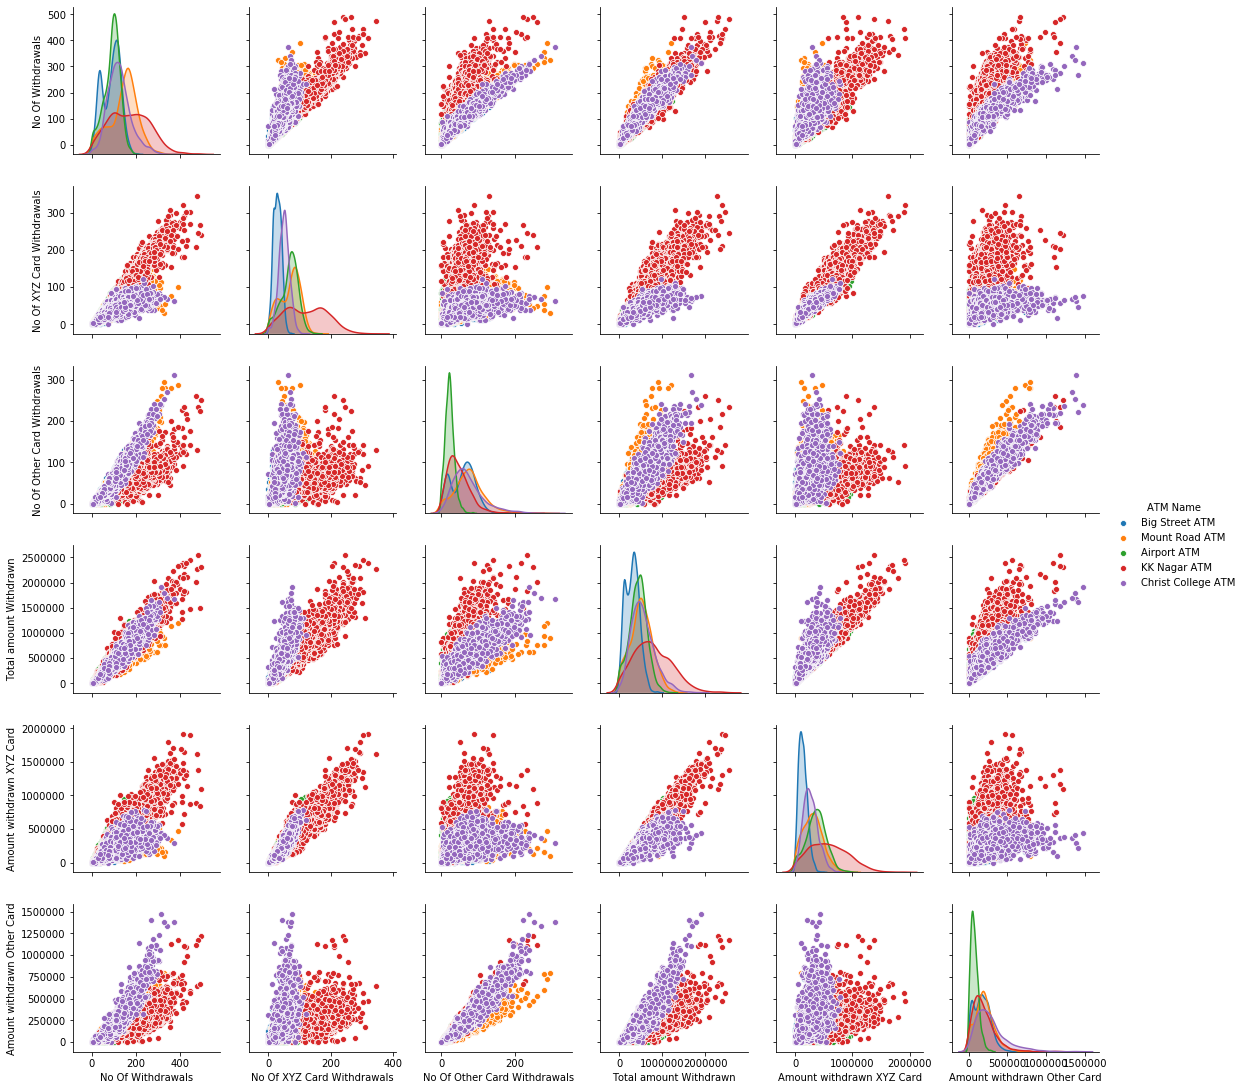

In [24]:
sns.pairplot(data, hue = 'ATM Name')

### Shows the correlation between features of the data set 

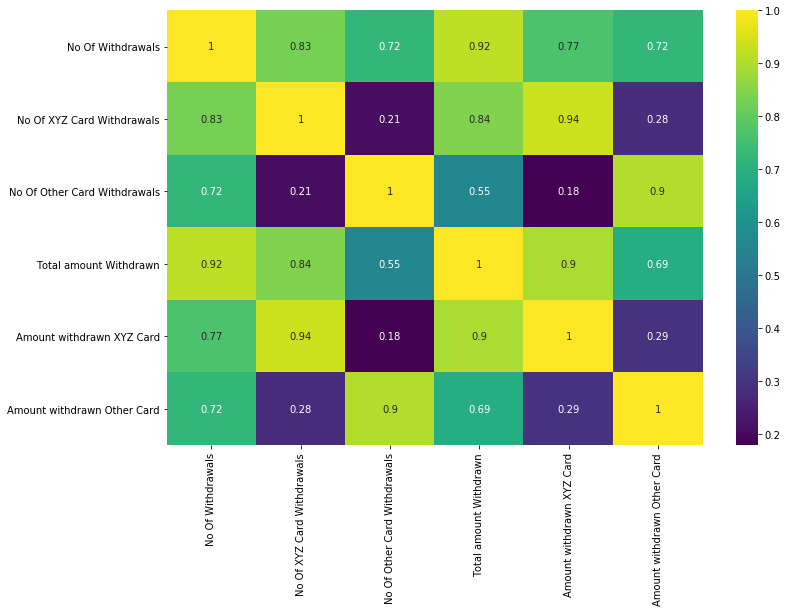

In [25]:
plt.figure(figsize=(12,8))
df1 = data.corr()
sns.heatmap(df1, annot= True, cmap = 'viridis')
#Basically the data about cards is redundant for us as it has no major effect on total amount withdrawn on any day or at any time. it only shows frequency of certain card holding customers


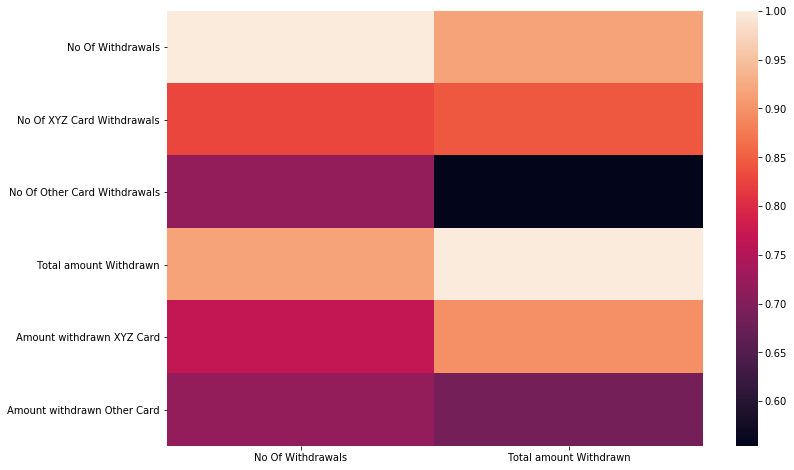

In [26]:
plt.figure(figsize=(12,8))
cols = ['No Of XYZ Card Withdrawals', 'No Of Other Card Withdrawals', 'Amount withdrawn Other Card', 'Amount withdrawn XYZ Card']
df2 = df1.drop(cols , axis =1)
sns.heatmap(df2)

# Trying to find the representation of the religion symbols

In [28]:
data[data['Transaction Date']=='2016-01-26']
#26 january is represented by 'N' in the festival/ religion column

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
9095,Big Street ATM,2016-01-26,46,17,29,74200,43000,31200,TUESDAY,N,H,WHW
9096,KK Nagar ATM,2016-01-26,248,148,100,1207300,836400,370900,TUESDAY,N,H,WHW
9097,Christ College ATM,2016-01-26,93,50,43,387200,278200,109000,TUESDAY,N,H,WHW


In [29]:
data[data['Transaction Date']=='2016-10-30']
#On this day, it was diwali and it falls under 'NH' category of festivals but the next 10 days also fall into the same category so the authenticity or correlation of this dataset with actual calendar is now doubtful.

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
10319,Big Street ATM,2016-10-30,103,13,90,316500,59400,257100,SUNDAY,NH,H,HHW
10320,Mount Road ATM,2016-10-30,9,9,0,23900,23900,0,SUNDAY,NH,H,HHW
10321,Airport ATM,2016-10-30,40,30,10,182800,155900,26900,SUNDAY,NH,H,HHW
10322,KK Nagar ATM,2016-10-30,53,33,20,278000,186300,91700,SUNDAY,NH,H,HHW
10323,Christ College ATM,2016-10-30,69,34,35,253300,142100,111200,SUNDAY,NH,H,HHW


In [35]:
data1 = data[data['Transaction Date'].dt.year==2016]
data1[data1['Festival Religion']=='M']

# M stands for Muslim as on 13th September 2016, it was bakri eid and the same entry matches the symbol.

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
9812,Big Street ATM,2016-07-07,79,20,59,289400,89300,200100,THURSDAY,M,H,WHW
9813,Mount Road ATM,2016-07-07,66,23,43,252000,117000,135000,THURSDAY,M,H,WHW
9814,KK Nagar ATM,2016-07-07,164,126,38,1165800,991100,174700,THURSDAY,M,H,WHW
9815,Christ College ATM,2016-07-07,184,61,123,762700,313200,449500,THURSDAY,M,H,WHW
10097,Big Street ATM,2016-09-13,112,30,82,382600,184900,197700,TUESDAY,M,H,WHW
10098,Mount Road ATM,2016-09-13,45,27,18,209000,150500,58500,TUESDAY,M,H,WHW
10099,KK Nagar ATM,2016-09-13,94,68,26,406600,307600,99000,TUESDAY,M,H,WHW
10100,Christ College ATM,2016-09-13,144,74,70,812900,479100,333800,TUESDAY,M,H,WHW
10234,Mount Road ATM,2016-12-10,20,20,0,53000,53000,0,WEDNESDAY,M,H,HHW
10235,Airport ATM,2016-12-10,4,4,0,10000,10000,0,WEDNESDAY,M,H,HHW


In [36]:
data1 = data[data['Transaction Date'].dt.year==2016]
data1[data1['Festival Religion']=='C']

# 'C' stands for christian as 25th March was good friday

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
8996,Big Street ATM,2016-01-01,155,42,113,663600,273700,389900,FRIDAY,C,H,WHH
8997,Airport ATM,2016-01-01,19,14,5,25600,20100,5500,FRIDAY,C,H,WHH
8998,KK Nagar ATM,2016-01-01,356,155,201,1878400,746200,1132200,FRIDAY,C,H,WHH
8999,Christ College ATM,2016-01-01,4,0,4,9100,0,9100,FRIDAY,C,H,WHH
9374,Big Street ATM,2016-03-25,99,19,80,222900,55800,167100,FRIDAY,C,H,WHH
9375,KK Nagar ATM,2016-03-25,179,131,48,889900,716500,173400,FRIDAY,C,H,WHH
9376,Christ College ATM,2016-03-25,26,20,6,103100,96800,6300,FRIDAY,C,H,WHH


In [49]:
data1 = data[data['Transaction Date'].dt.year==2016]
data1[data1['Festival Religion']=='N']



#26th january is republic day so that's a national holiday os therefore N could stand for National
#14th april was Ambedkar jayanti and it's tagged as N too whereas it's not officially national holiday.
#15th april was a federal holiday but as you can see in the cell below it shows NH

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
9095,Big Street ATM,2016-01-26,46,17,29,74200,43000,31200,TUESDAY,N,H,WHW
9096,KK Nagar ATM,2016-01-26,248,148,100,1207300,836400,370900,TUESDAY,N,H,WHW
9097,Christ College ATM,2016-01-26,93,50,43,387200,278200,109000,TUESDAY,N,H,WHW
9435,Big Street ATM,2016-08-04,10,6,4,10700,4400,6300,FRIDAY,N,H,WHH
9436,Airport ATM,2016-08-04,37,23,14,120200,87200,33000,FRIDAY,N,H,WHH
9437,KK Nagar ATM,2016-08-04,150,109,41,898800,681000,217800,FRIDAY,N,H,WHH
9461,Big Street ATM,2016-04-14,45,13,32,144600,46700,97900,THURSDAY,N,H,WHW
9462,KK Nagar ATM,2016-04-14,31,23,8,169500,129500,40000,THURSDAY,N,H,WHW
9463,Christ College ATM,2016-04-14,147,37,110,348300,92800,255500,THURSDAY,N,H,WHW
9533,KK Nagar ATM,2016-01-05,56,42,14,187700,146500,41200,SUNDAY,N,H,HHW


In [38]:
data[data['Transaction Date']=='2016-04-15']

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
9464,Mount Road ATM,2016-04-15,14,11,3,60000,47700,12300,FRIDAY,NH,W,HWH
9465,Airport ATM,2016-04-15,16,14,2,96800,91200,5600,FRIDAY,NH,W,HWH
9466,KK Nagar ATM,2016-04-15,268,179,89,1474500,1113700,360800,FRIDAY,NH,W,HWH
9467,Christ College ATM,2016-04-15,186,83,103,905000,502600,402400,FRIDAY,NH,W,HWH


 But when we look at the year 2017 we find strange results for the same religion


In [51]:
data1 = data[data['Transaction Date'].dt.year==2017]
data1[data1['Festival Religion']=='N']

#5th january is Guru gobind Jayanti so definitely not a national holiday but could be a bank holiday, doesn't really indicate any religion there
# So conclude we can say that we some entries and wrongly marked for the holidays but majority are national holidays and 'N' resembles National holidays

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
10492,Big Street ATM,2017-01-26,62,17,45,146800,50100,96700,THURSDAY,N,H,WHW
10493,Mount Road ATM,2017-01-26,52,15,37,111000,36000,75000,THURSDAY,N,H,WHW
10494,Airport ATM,2017-01-26,19,14,5,88200,70200,18000,THURSDAY,N,H,WHW
10495,KK Nagar ATM,2017-01-26,2,1,1,6000,2000,4000,THURSDAY,N,H,WHW
10496,Christ College ATM,2017-01-26,194,24,170,891000,120300,770700,THURSDAY,N,H,WHW
10750,Big Street ATM,2017-03-29,107,40,67,515400,330300,185100,WEDNESDAY,N,H,WHW
10751,Mount Road ATM,2017-03-29,140,57,83,461300,261800,199500,WEDNESDAY,N,H,WHW
10752,KK Nagar ATM,2017-03-29,190,116,74,1260700,889200,371500,WEDNESDAY,N,H,WHW
10753,Christ College ATM,2017-03-29,227,60,167,1023000,466200,556800,WEDNESDAY,N,H,WHW
10820,Big Street ATM,2017-04-14,125,26,99,447700,125700,322000,FRIDAY,N,H,WHH


In [52]:
data1 = data[data['Transaction Date'].dt.year==2016]
data1[data1['Festival Religion']=='H']

#15th Jan was Pongal, 16th was guru gobind singh jayanti
#25th Aug was janmashtami so defintely 'H' stands for Hindu
#And there by 'NH' stands for no holiday

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
9051,Big Street ATM,2016-01-15,130,44,86,424300,217900,206400,FRIDAY,H,H,WHH
9052,KK Nagar ATM,2016-01-15,197,131,66,760700,513300,247400,FRIDAY,H,H,WHH
9053,Christ College ATM,2016-01-15,79,38,41,269100,146400,122700,FRIDAY,H,H,WHH
9054,Big Street ATM,2016-01-16,117,35,82,379400,128300,251100,SATURDAY,H,H,HHH
9055,Airport ATM,2016-01-16,6,5,1,9700,9200,500,SATURDAY,H,H,HHH
9056,KK Nagar ATM,2016-01-16,88,58,30,331900,207000,124900,SATURDAY,H,H,HHH
9057,Christ College ATM,2016-01-16,73,38,35,273200,149500,123700,SATURDAY,H,H,HHH
9058,Big Street ATM,2016-01-17,118,38,80,354400,153300,201100,SUNDAY,H,H,HHW
9059,KK Nagar ATM,2016-01-17,202,119,83,777600,503000,274600,SUNDAY,H,H,HHW
9060,Christ College ATM,2016-01-17,76,34,42,135700,74600,61100,SUNDAY,H,H,HHW


### In conclusion, the religion symbols are M - Muslim, C - Christian, H - Hindu and N for national holiday and NH for No holiday.

### Nevertheless, there were some discrepancies in the entries. In many entries, a date was declared as some religious holiday but according to the calendar that day was a normal working day. At the same time, some holidays were wrongly labeled. 

### The greatest drawback here is that these entries have been marked by bank holidays only, so if it's a holiday then the religion column tells us which holiday it was. Doesn't mean that all festivals are indicated. Hence we won't be able to tell if on a certain day whether the number of withdrawals was more due to a festival or not.

website referred to crosscheck few dates = https://www.timeanddate.com/calendar/monthly.html?year=2016&month=8&country=35